In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plot_likert

In [2]:
PA = pd.read_csv('Files/CR-studentexperiences.csv', header = 1)
SA = pd.read_csv('Files/CR-shortanswer.csv')

**Q1** Will the time taken for the users to enter a set of characters using Character Recorder be roughly the same as the time taken using Excel?

In [3]:
EX = pd.to_datetime(PA["end.1"][9:]) - pd.to_datetime(PA["start.1"][9:])
CR = pd.to_datetime(PA["end.2"][9:]) - pd.to_datetime(PA["start.2"][9:])

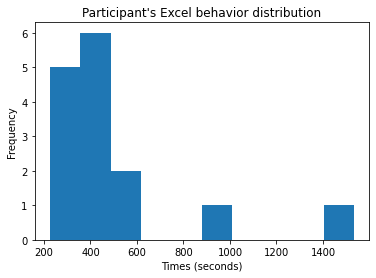

In [4]:
EX.mean()
EX.astype('timedelta64[s]').plot.hist()

plt.title("Participant's Excel behavior distribution")
plt.xlabel("Times (seconds)") 
plt.savefig(os.path.join('Pics/Guilding Analysis/EX-behavior.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

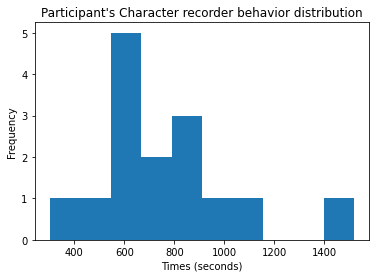

In [5]:
CR.mean()
CR.astype('timedelta64[s]').plot.hist()

plt.title("Participant's Character recorder behavior distribution")
plt.xlabel("Times (seconds)") 
plt.savefig(os.path.join('Pics/Guilding Analysis/CR-behavior.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

We find out that the main value can not represent the user's time spent on the software based on the graph. So we will keep using the Box chart to explore more information. 

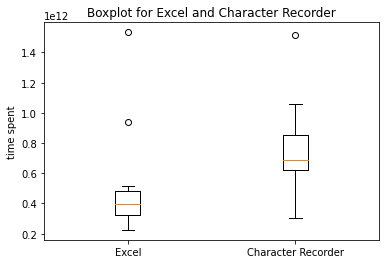

In [6]:
data_1 = EX
data_2 = CR
data = [data_1, data_2]

plt.boxplot(data)
plt.xticks([1, 2], ["Excel", "Character Recorder"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.savefig(os.path.join('Pics/Guilding Analysis/Boxplot.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


After we look through Boxplot, we find out that there are two outliers in EX and one in CR. So, in the next step, We will remove those outliers and get their mean and median time.

In [7]:
def outlier_remove(col):

    mid = col.quantile(0.75) - col.quantile(0.25)

    top = col.quantile(0.75) + 1.5 * mid
    bot = col.quantile(0.25) - 1.5 * mid

    def remove(x):
        if x <= top and x >= bot:
            return x

    return col.map(remove)

In [8]:
New_CR = outlier_remove(CR).dropna()
New_EX = outlier_remove(EX).dropna()

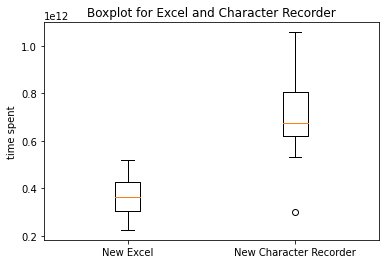

In [9]:
data_1 = New_EX
data_2 = New_CR
data = [data_1, data_2]

plt.boxplot(data)
plt.xticks([1, 2], ["New Excel", "New Character Recorder"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.savefig(os.path.join('Pics/Guilding Analysis/New-Boxplot.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [10]:
print('Excel Median time spent : ' + str(New_EX.median()))
print('Excel Mean time spent : ' +  str(New_EX.mean()))

Excel Median time spent : 0 days 00:06:04
Excel Mean time spent : 0 days 00:06:11.846153846


In [11]:
print('Character Recorder Median time spent : ' + str(New_CR.median()))
print('Character Recorder Mean time spent : ' +  str(New_CR.mean()))

Character Recorder Median time spent : 0 days 00:11:14.500000
Character Recorder Mean time spent : 0 days 00:11:50.571428571


After we delete outlier, we will get the t-test result

In [12]:
len(New_EX)

13

In [13]:
New_CR = outlier_remove(New_CR).dropna()
len(New_CR)

13

Compare two different software (Excel and Character Recorder); Whether there is a significant difference in the time spent by users. Through the comparative analysis of the two sets of data, it is judged whether character Recorder is a software that is more suitable for entering such information than excel. 

Firstly, we set the null hypothesis that the character recorder didn't have many differences between excel in input terms. After using the paired t-test, we got a p-value of less than 0.05 (1.3398e-07). So we reject the null hypothesis that character recorders have many differences between Excel.

In [14]:
stats.ttest_rel(New_EX, New_CR)

Ttest_relResult(statistic=-10.944205270380335, pvalue=1.3398628969046098e-07)

**Q2** Will the data entered using Character Recorder be more consistent than the data entered using Excel? 

In this question, we go throught character recorder and Excel files and count words. 

In [15]:
# Count excel words
def excel_word_detach():
    # read excel files and fill NA values as "of", trans interger to string
    folder = os.listdir("Experiment Files")
    folder.remove('.DS_Store')
    d={}

    for i in folder:
        test = pd.read_excel("Experiment Files/" + i + "/" + i + ".xlsx").fillna("of").astype(str)
        # remove stopwords (e.g., of, the, or) and create empty list to store values
        remove = ["of", "the", "or"]
        store = []

        # store non-na value into store
        for i in test:
            for p in test[i]:
                if p not in remove:
                    store.append(p.split())

        # store non-stopwords value into word_count
        word_count = []
        for q in store:
            for c in q:
                if c not in remove:
                    word_count.append(c)

        # store and count value, store those value and words into dictionary d
        for x in word_count:
            if not x in d:
                d[x]=1
            else:
                d[x]=d[x]+1
    return d

In [16]:
orders = excel_word_detach()

sort_orders = sorted(orders.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

Sample 31
sheath 23
cm 23
spikes 17
1 17
shaped 17
summits 16
2 16
Shape 15
Character 14
5 14
10 14
40 14
100 13
shape 13
stem 12
U 11
Length 10
conspicuous 10
brown 9
brown-red 9
lanciform 9
culms 7
Number 7
maroon 7
gutter-shaped 7
lanceoloid 7
lanceloid 7
length 6
visibility 6
inflorescence 6
red 6
culm 5
vegetative 5
summit 5
color 5
U-shaped 5
Visibility 4
Coloration 4
reddish 4
Prominence 4
number 4
gutter 4
count 4
lancehead-shaped 4
Color 3
units 3
Summrary 3
Sheath 3
Inflorescence 3
red-brown 3
40cm 2
conspicious 2
100cm 2
Carex 2
muskingumensis 2
coloration 2
(cm) 2
_ 2
range-percentile 2
unit 2
Colour 2
character 2
sample 2
Stem 2
Summits 2
Units 2
sumits 2
Lancehead-shaped 1
Gutter 1
Lanceoloid 1
u-shaped 1
… 1
STEM 1
LEAF 1
INFLORESCENCE 1
UNIT 1
mean=70.0 1
range=(40-) 1
55-80(-100) 1
mean=7.5 1
range=(5-) 1
6.25-8.75(-10) 1
Description 1
Stem: 1
(40-)55-85(-100) 1
long; 1
conspicuous. 1
Leaf: 1
brown; 1
shaped. 1
unit: 1
(5-)6.25-8.75(-10); 1
lanceoloid. 1
prominence 1
r

In [17]:
# Total 116 different word contribute 15 different files
len(orders)

116

In [18]:
sort_orders = dict(sorted(orders.items(), key=lambda x: x[1], reverse=False))

In [19]:
sort_orders

{'Lancehead-shaped': 1,
 'Gutter': 1,
 'Lanceoloid': 1,
 'u-shaped': 1,
 '…': 1,
 'STEM': 1,
 'LEAF': 1,
 'INFLORESCENCE': 1,
 'UNIT': 1,
 'mean=70.0': 1,
 'range=(40-)': 1,
 '55-80(-100)': 1,
 'mean=7.5': 1,
 'range=(5-)': 1,
 '6.25-8.75(-10)': 1,
 'Description': 1,
 'Stem:': 1,
 '(40-)55-85(-100)': 1,
 'long;': 1,
 'conspicuous.': 1,
 'Leaf:': 1,
 'brown;': 1,
 'shaped.': 1,
 'unit:': 1,
 '(5-)6.25-8.75(-10);': 1,
 'lanceoloid.': 1,
 'prominence': 1,
 'reddish-brown': 1,
 'vegitative': 1,
 'clums': 1,
 'stems': 1,
 'not': 1,
 'applicable': 1,
 'Maroon': 1,
 'Brown-red': 1,
 'visability': 1,
 'colour': 1,
 'lanceiloid': 1,
 'colum': 1,
 'maroom': 1,
 'u': 1,
 'Count': 1,
 'Spikes': 1,
 'Vegetative': 1,
 'Inflorescene': 1,
 'Conspicuous': 1,
 'Charater': 1,
 'conspicous': 1,
 '40cm': 2,
 'conspicious': 2,
 '100cm': 2,
 'Carex': 2,
 'muskingumensis': 2,
 'coloration': 2,
 '(cm)': 2,
 '_': 2,
 'range-percentile': 2,
 'unit': 2,
 'Colour': 2,
 'character': 2,
 'sample': 2,
 'Stem': 2,
 'S

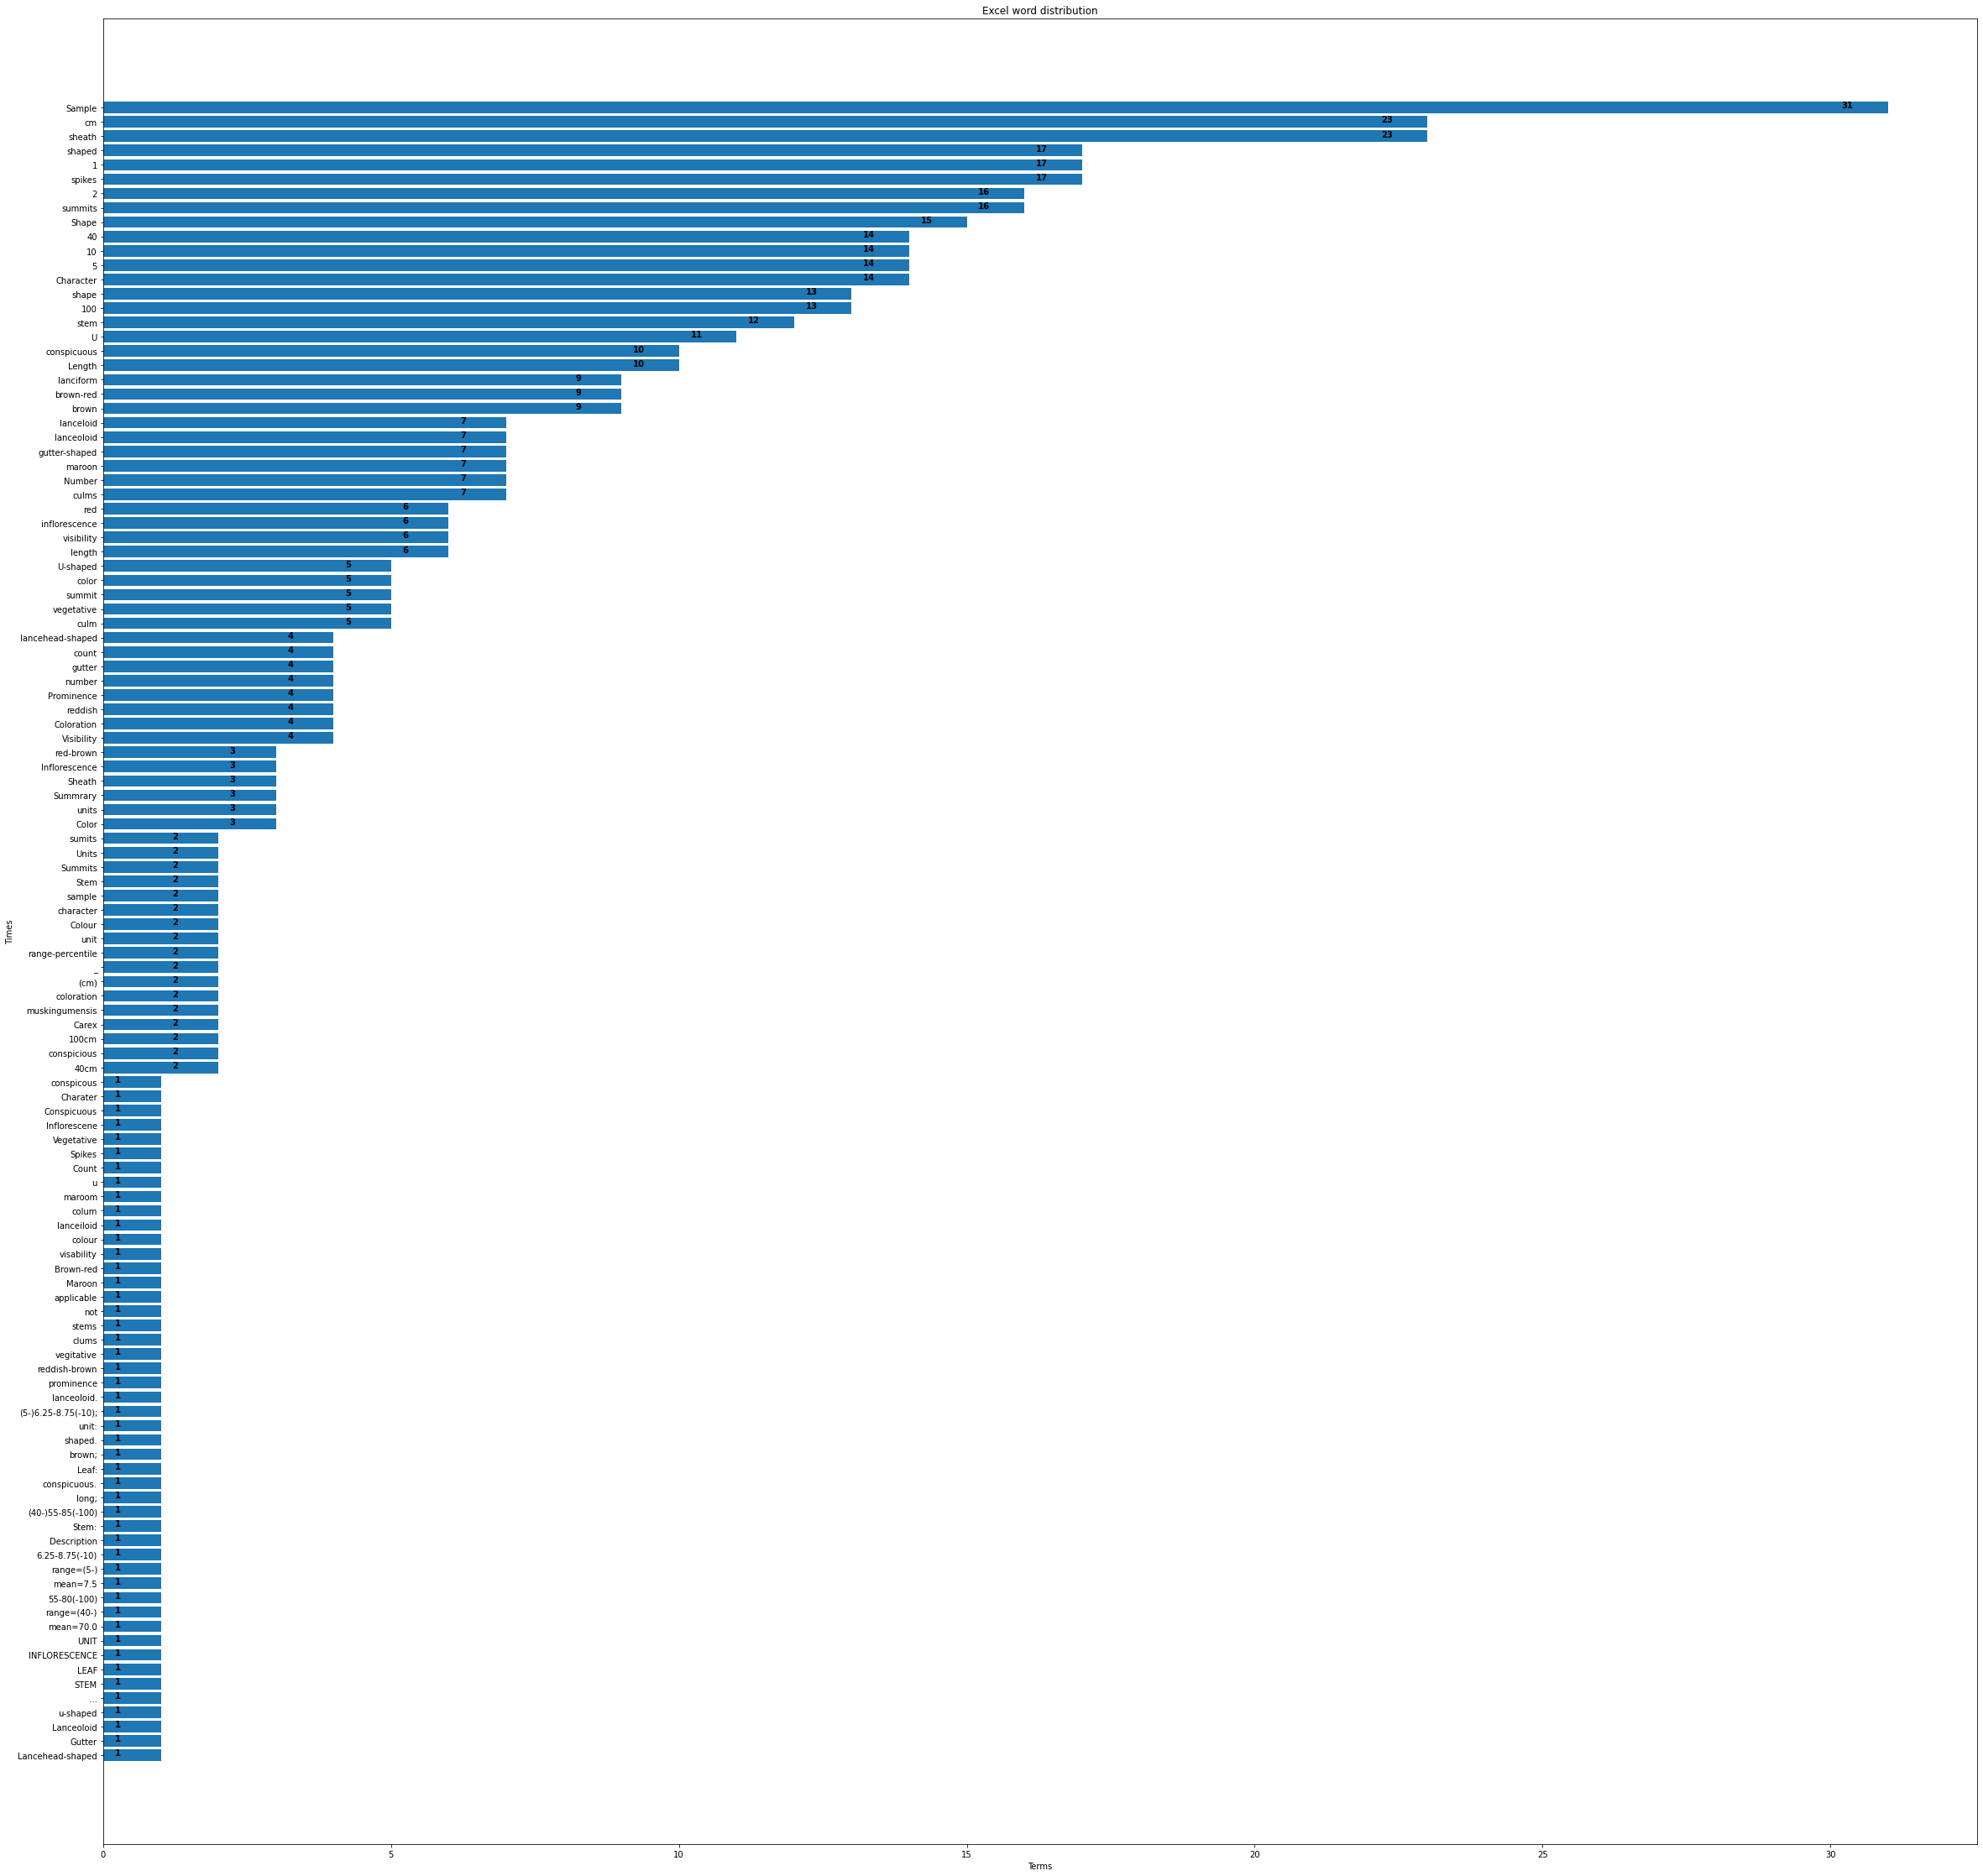

In [20]:
# draw bar chart
data = sort_orders
names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(40, 40))
plt.barh(range(len(data)), values, tick_label=names)
plt.title("Excel word distribution")
plt.xlabel("Terms")
plt.ylabel("Times")

# show how many times those term been used in the experiment
for i, v in enumerate(values):
    plt.text(v - 0.8, i - 0.03 , str(v), color='black', fontweight='bold')

plt.show()


Read character recorder export

In [21]:
# Count cr words
def cr_word_detach():
    # read cr files and fill NA values as "of", trans interger to string
    folder = os.listdir("Experiment Files")
    folder.remove('.DS_Store')
    d={}

    for i in folder:
        test = pd.read_csv("Experiment Files/" + i + "/Carex muskingumensis/Carex muskingumensis.csv").astype(str)
        test = test.drop(columns=['Summary'])
        # remove stopwords (e.g., of, the, or) and create empty list to store values
        remove = ["of", "the", "or"]
        store = []

        # store non-na value into store
        for i in test:
            for p in test[i]:
                if p not in remove:
                    store.append(p.split())

        # store non-stopwords value into word_count
        word_count = []
        for q in store:
            for c in q:
                if c not in remove:
                    word_count.append(c)

        # store and count value, store those value and words into dictionary d
        for x in word_count:
            if not x in d:
                d[x]=1
            else:
                d[x]=d[x]+1
    return d

In [22]:
orders = cr_word_detach()

sort_orders = sorted(orders.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

stem 31
sheath 31
red 31
brown; 31
Shape 30
inflorescence 30
summit 29
lanceoloid; 22
nan 20
U 20
shaped; 20
Length 16
Color 16
Number 15
units 15
unit 15
40 15
5 15
100 14
10 14
Visibility 12
gutter-shape; 10
conspicious; 8
conspicuous; 7
lancehead-shaped; 6
Prominence 3
vegetative 3
lancoloid; 2
1000 1
400 1


In [23]:
# Total 30 different word contribute 15 different files
len(orders)

30

In [24]:
sort_orders = dict(sorted(orders.items(), key=lambda x: x[1], reverse=False))

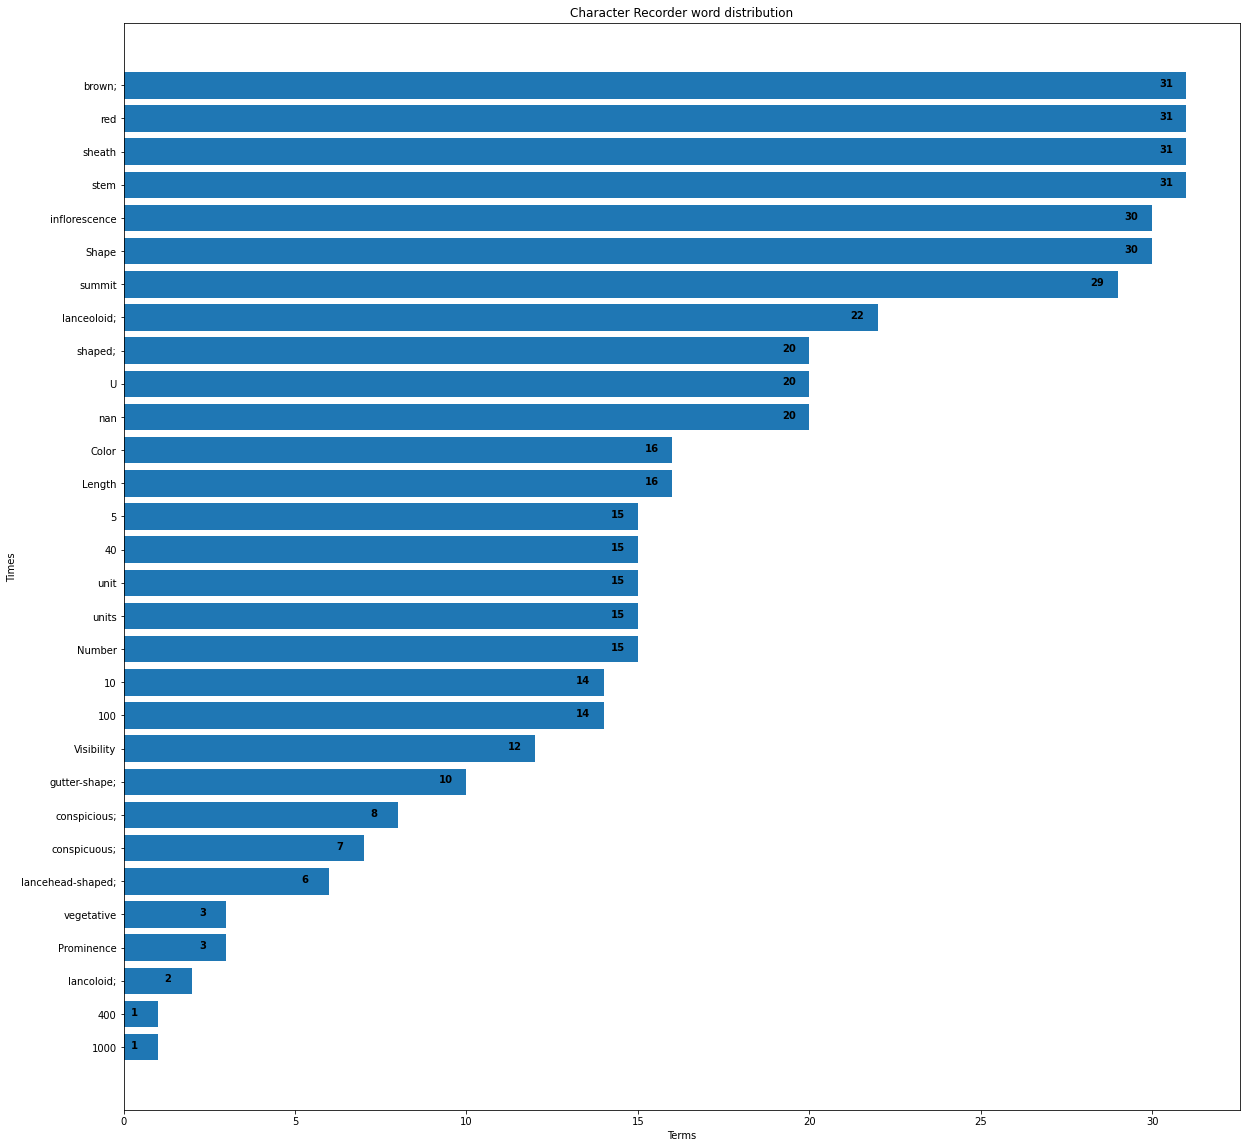

In [25]:
# draw bar chart
data = sort_orders
names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(20, 20))
plt.barh(range(len(data)), values, tick_label=names)
plt.title("Character Recorder word distribution")
plt.xlabel("Terms")
plt.ylabel("Times")

# show how many times those term been used in the experiment
for i, v in enumerate(values):
    plt.text(v - 0.8, i - 0.03 , str(v), color='black', fontweight='bold')

plt.show()


**Q3** Will the user add new terms to the ontology while using Character Recorder? If so, how often?

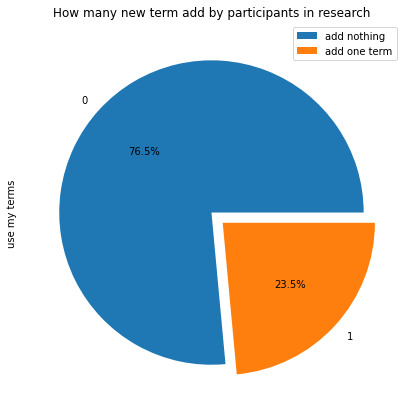

In [26]:
plt.figure(figsize=[9,7])
PA["use my terms"][1:].dropna().value_counts().plot.pie(explode = (0, 0.1), autopct='%1.1f%%')
plt.title("How many new term add by participants in research")

plt.legend(['add nothing', 'add one term'])
plt.show()

**Q4** Will the terms added by different users to the ontology create conflicts in the ontology? If so, what kinds of conflict? and what are their relative frequency? 

**Q5** Will the user find the software intuitive to use and instructions clear and easy to follow?

As for answering this question. firstly, we should draw bar chart for each question. 

In [27]:
def missing_fill(question):

    if "almost always" not in question.keys():
        fill = pd.Series([0], index = ["almost always"])
        question = question.add(fill, fill_value=0)
    
    if "sometimes" not in question.keys():
        fill = pd.Series([0], index = ["sometimes"])
        question = question.add(fill, fill_value=0)
    
    if "rarely" not in question.keys():
        fill = pd.Series([0], index = ["rarely"])
        question = question.add(fill, fill_value=0)
    
    else:
        question = question

    return question

In [28]:
def missing_fill_2(question):

    if "good" not in question.keys():
        fill = pd.Series([0], index = ["good"])
        question = question.add(fill, fill_value=0)
    
    if "fair" not in question.keys():
        fill = pd.Series([0], index = ["fair"])
        question = question.add(fill, fill_value=0)
    
    if "poor" not in question.keys():
        fill = pd.Series([0], index = ["poor"])
        question = question.add(fill, fill_value=0)
    
    else:
        question = question

    return question

Q2#1 - Your experience with the main components of Character Recorder: - Did what I wanted it to do

In [29]:
def draw(value, group, Width):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
   
    barWidth = Width
    br = np.arange(3)
    
    for i in range(1, 6):
        q = value["Q2#" + str(group) + "_" +str(i)][19:34].value_counts()

        ax.bar(br, missing_fill(q)[['almost always', 'sometimes', 'rarely']], width = 0.25, label = value["Q2#" + str(group) + "_" +str(i)][0].split("-")[2])
        br = [x + barWidth for x in br]
        ax.legend()

    plt.xticks([r + barWidth for r in range(3)],
        ['almost always', 'sometimes', 'rarely'])

Text(0.5, 1.0, "User's experiences - Did what I wanted it to do")

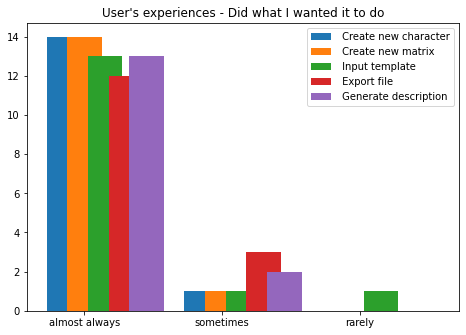

In [30]:
draw(SA, 1, 0.15)
plt.title("User's experiences - Did what I wanted it to do")

Q2#2 - Your experience with the main components of Character Recorder: - Responded quickly

Text(0.5, 1.0, "User's experiences - Responded quickly")

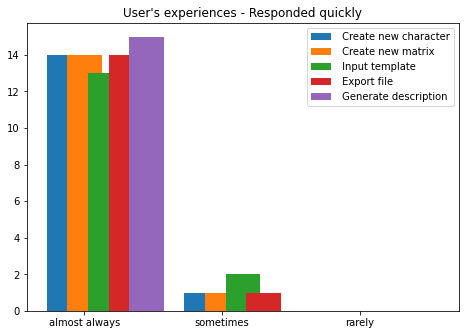

In [31]:
draw(SA, 2, 0.15)
plt.title("User's experiences - Responded quickly")

Q2#3 - Your experience with the main components of Character Recorder: - My experience with it was

In [32]:
def draw2(value, group, Width):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    barWidth = Width
    br = np.arange(3)
    
    for i in range(1, 6):
        q = value["Q2#" + str(group) + "_" +str(i)][19:34].value_counts()

        ax.bar(br, missing_fill_2(q)[['good', 'fair', 'poor']], width = 0.25, label = value["Q2#" + str(group) + "_" +str(i)][0].split("-")[2])
        br = [x + barWidth for x in br]
        ax.legend()

    plt.xticks([r + barWidth for r in range(3)],
        ['good', 'fair', 'poor'])

Text(0.5, 1.0, "User's experiences - My experience with it was")

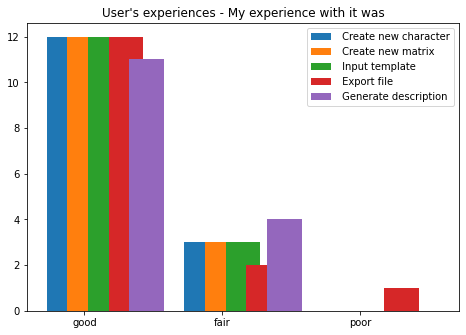

In [33]:
draw2(SA, 3, 0.15)
plt.title("User's experiences - My experience with it was")

Q3 - Your experience with features of Character Recorder (CR):

In [34]:
def missing_fill_3(question):

    if "Strongly agree" not in question.keys():
        fill = pd.Series([0], index = ["Strongly agree"])
        question = question.add(fill, fill_value=0)
    
    if "Agree" not in question.keys():
        fill = pd.Series([0], index = ["Agree"])
        question = question.add(fill, fill_value=0)
    
    if "Somewhat agree" not in question.keys():
        fill = pd.Series([0], index = ["Somewhat agree"])
        question = question.add(fill, fill_value=0)
    
    if "Neither agree nor disagree" not in question.keys():
        fill = pd.Series([0], index = ["Neither agree nor disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Somewhat disagree" not in question.keys():
        fill = pd.Series([0], index = ["Somewhat disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Disagree" not in question.keys():
        fill = pd.Series([0], index = ["Disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Strongly disagree" not in question.keys():
        fill = pd.Series([0], index = ["Strongly disagree"])
        question = question.add(fill, fill_value=0)

    else:
        question = question

    return question

In [35]:
def draw3(value, Width, xlabel, start, end):
    fig = plt.figure(figsize=[15, 15])
    ax = fig.add_axes([0,0,1,1])

    barWidth = Width
    br = np.arange(7)
    
    for i in range(start, end):
        q = value["Q3_" + str(i)][19:34].value_counts()

        ax.bar(br, missing_fill_3(q), width = 0.1, label = value["Q3_" + str(i)][0].split("-")[1])
        ax.margins(x=0.1)
        br = [x + barWidth for x in br]
        ax.legend()
        #ax.legend(title='Columns', bbox_to_anchor=(1, 1.02), loc='upper left')
    
    plt.xticks([r + barWidth for r in range(7)],
        xlabel)

Text(0.5, 1.0, "User's experience with features of Character Recorder (CR) Part one")

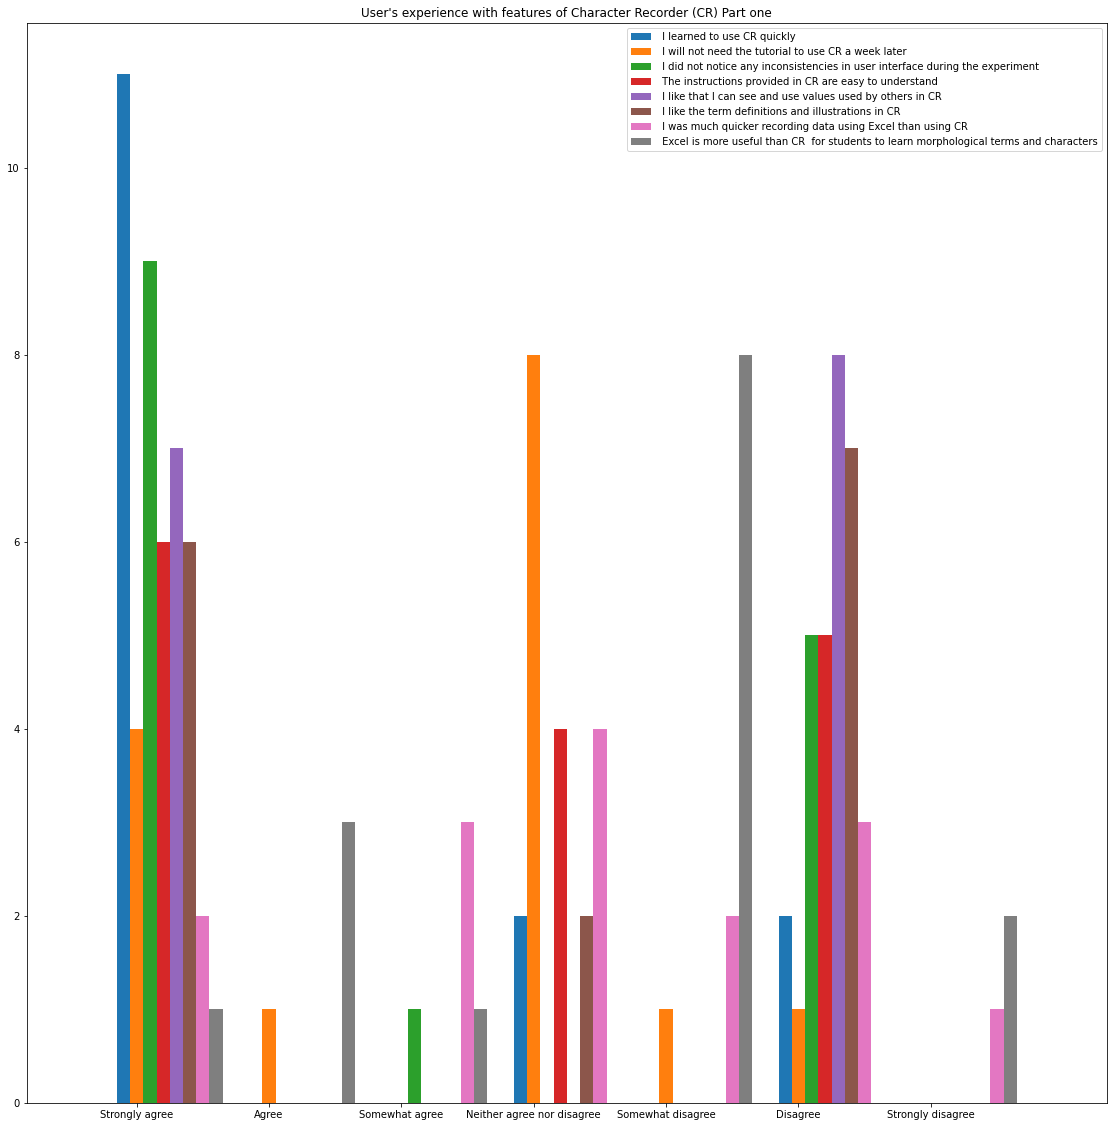

In [36]:
a = ['Strongly agree','Agree', 'Somewhat agree', 'Neither agree nor disagree',
       'Somewhat disagree', 'Disagree', 'Strongly disagree']


draw3(SA, 0.1, a, 1, 9)
plt.title("User's experience with features of Character Recorder (CR) Part one")

Text(0.5, 1.0, "User's experience with features of Character Recorder (CR) Part two")

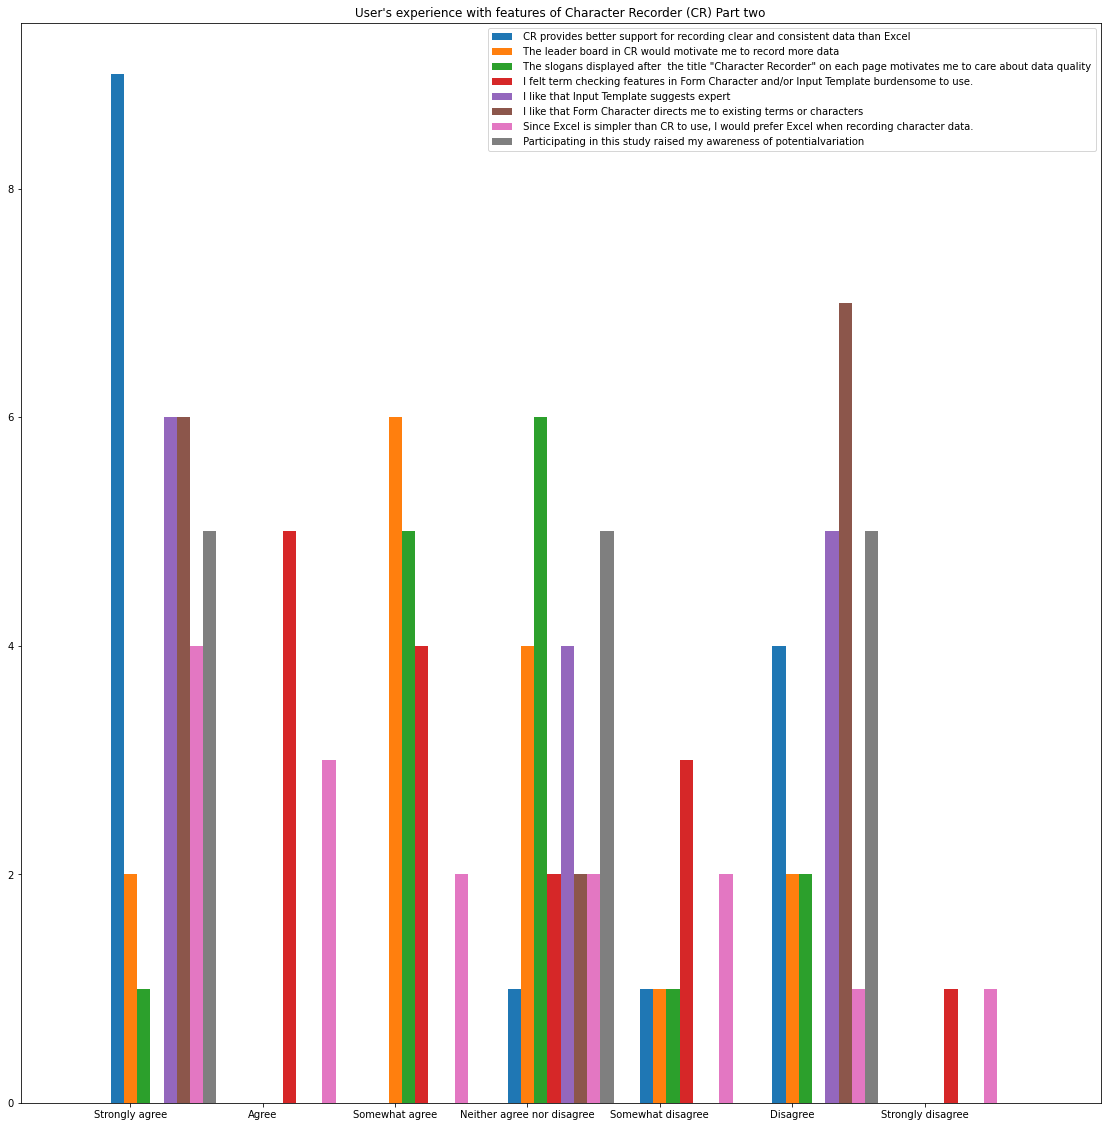

In [37]:
draw3(SA, 0.1, a, 9, 17)
plt.title("User's experience with features of Character Recorder (CR) Part two")

Q14 - Your perceived task load with Character Recorder (CR)

In [38]:
df = pd.DataFrame(SA[["Q14_1", "Q14_2", "Q14_3", "Q14_4"]][19:34], columns=["Q14_1", "Q14_2", "Q14_3", "Q14_4"])
df.rename(columns={'Q14_1': "Mental Demand", 'Q14_2': 'Performance', 'Q14_3': 'Effort', 'Q14_4': 'Frustration'}, inplace=True)

df

,Mental Demand,Performance,Effort,Frustration
19,3,Much stronger than Excel\n9,4,Much stronger than Excel\n9
20,Same as Excel\n5,8,3,2
21,Same as Excel\n5,Much stronger than Excel\n9,Same as Excel\n5,Same as Excel\n5
22,Same as Excel\n5,4,6,4
23,6,7,7,4
24,Same as Excel\n5,6,4,4
25,8,6,7,6
26,8,6,7,8
27,8,Much stronger than Excel\n9,8,7
28,4,Same as Excel\n5,2,3


In [39]:
scales = ["Much weaker than Excel\n1", "2", "3","4","Same as Excel\n5","6","7","8","Much stronger than Excel\n9"]

In [66]:
a = [i for i in range (9, 0, -1)]
b = [p for p in range (0, 15)]
c = a + b

v = [d for d in range(0, 27)]

Text(0.5, 1.0, "User's perceived task load with Character Recorder (compare with Excel)")

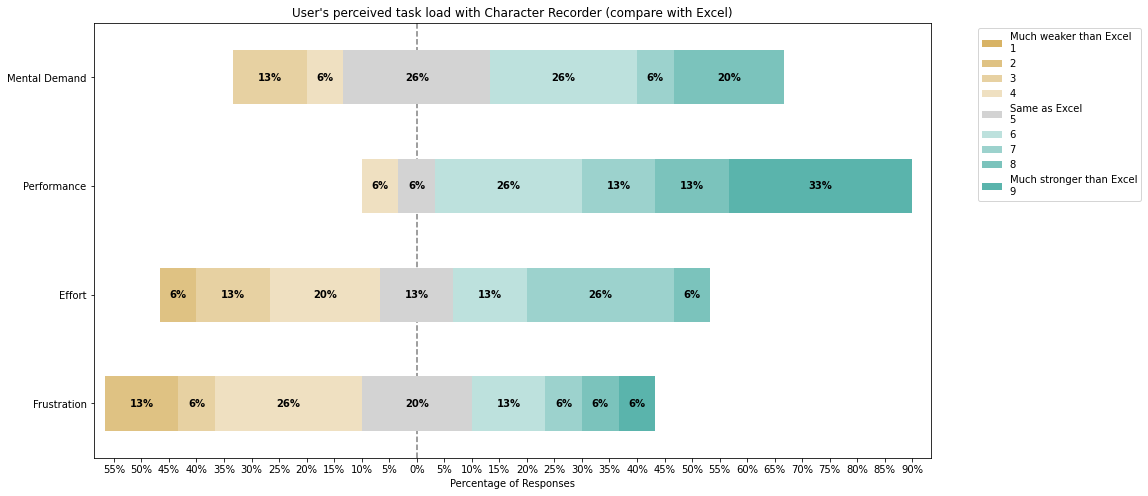

In [70]:
plot_likert.plot_likert(df, scales,figsize=(15,8), plot_percentage= True,
                        bar_labels=True, bar_labels_color="black", colors=plot_likert.colors.likert9)
plt.title("User's perceived task load with Character Recorder (compare with Excel)")

In [61]:
a = [i for i in range (9, 0, -1)]
b = [p for p in range (0, 15)]
c = a + b


[9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]